In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support.expected_conditions import presence_of_element_located
import webdriver_manager
import urllib
import pandas as pd
import time
import os

In [2]:
import requests

In [3]:
url = 'https://chromedriver.storage.googleapis.com/LATEST_RELEASE_'
url_file = 'https://chromedriver.storage.googleapis.com/'
file_name = 'chromedriver_win32.zip'

In [4]:
version = input()
version_response = requests.get(url + version)

In [5]:
url + version

'https://chromedriver.storage.googleapis.com/LATEST_RELEASE_90.0.4430'

In [6]:
version_response

<Response [200]>

In [7]:
version_response.text

'90.0.4430.24'

In [8]:
if version_response.text:
    file = requests.get(url_file + version_response.text + '/' + file_name)
    with open(file_name, 'wb') as code:
        code.write(file.content)

In [9]:
import zipfile

with zipfile.ZipFile('chromedriver_win32.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [3]:
df = pd.read_pickle('esrb_ratings.pkl')

In [4]:
df.head()

,title,consoles,descriptors,rating
0,Blizzard Arcade Collection,"[PlayStation 4, Nintendo Switch, Xbox One]","[Blood, Fantasy Violence, Language, Use of Tob...",T
1,Rez Infinite,[PlayStation 4],[Fantasy Violence],E10plus
2,Hotshot Racing,"[PlayStation 4, Nintendo Switch]","[Alcohol Reference, Language, Mild Violence]",E10plus
3,Sea of Solitude : The Director's Cut,[Nintendo Switch],"[Fantasy Violence, Language]",T
4,Ape Out,[Nintendo Switch],"[Blood and Gore, Violence]",T


In [5]:
titles = []
bad_chars = ['*', ':', '+', '~', '-', '/', '.', '?', '<', '>']
for title in df['title']:
    for char in bad_chars:
        title = title.replace(char, '')
    titles.append(title)

In [6]:
titles[:10]

['Blizzard Arcade Collection',
 'Rez Infinite',
 'Hotshot Racing',
 "Sea of Solitude  The Director's Cut",
 'Ape Out',
 'GalGun Returns',
 "Super Mario 3D World  Bowser's Fury",
 'Code Realize Wintertide Miracles',
 "Doug Flutie's Maximum Football 2020",
 'Fallen Legion Revenants']

In [7]:
df['title'] = titles

In [8]:
df['title'][:10]

0             Blizzard Arcade Collection
1                           Rez Infinite
2                         Hotshot Racing
3    Sea of Solitude  The Director's Cut
4                                Ape Out
5                         GalGun Returns
6    Super Mario 3D World  Bowser's Fury
7       Code Realize Wintertide Miracles
8    Doug Flutie's Maximum Football 2020
9                Fallen Legion Revenants
Name: title, dtype: object

In [9]:
df[:10]

,title,consoles,descriptors,rating
0,Blizzard Arcade Collection,"[PlayStation 4, Nintendo Switch, Xbox One]","[Blood, Fantasy Violence, Language, Use of Tob...",T
1,Rez Infinite,[PlayStation 4],[Fantasy Violence],E10plus
2,Hotshot Racing,"[PlayStation 4, Nintendo Switch]","[Alcohol Reference, Language, Mild Violence]",E10plus
3,Sea of Solitude The Director's Cut,[Nintendo Switch],"[Fantasy Violence, Language]",T
4,Ape Out,[Nintendo Switch],"[Blood and Gore, Violence]",T
5,GalGun Returns,[Nintendo Switch],"[Language, Sexual Themes]",M
6,Super Mario 3D World Bowser's Fury,[Nintendo Switch],[Mild Cartoon Violence],E
7,Code Realize Wintertide Miracles,[Nintendo Switch],"[Blood, Mild Language, Mild Suggestive Themes,...",T
8,Doug Flutie's Maximum Football 2020,"[PlayStation 4, Xbox One]",[No Descriptors],E
9,Fallen Legion Revenants,"[PlayStation 4, Nintendo Switch]","[Fantasy Violence, Mild Language]",T


In [10]:
df['rating'].unique()

array(['T', 'E10plus', 'M', 'E'], dtype=object)

In [11]:
for x in df['rating'].unique():
    os.mkdir('./images/' + x)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: './images/T'

In [12]:
option = webdriver.ChromeOptions()
option.add_argument('incognito')

driver = webdriver.Chrome(options=option)

In [13]:
driver.get('https://google.com/images')

filenames = []
for idx in range(len(df)):
    try:
        driver.find_element(By.NAME, 'q').clear()
        driver.find_element(By.NAME, 'q').send_keys(df['title'][idx] + ' video game screenshot' + Keys.RETURN)
        
        images = driver.find_elements_by_class_name('rg_i')
        print('#' + str(idx) + ' --- ' + df['title'][idx])
        for i, image in enumerate(images[:10]):
            filename = './images/' + df['rating'][idx] + '/' + df['title'][idx] + '_' + str(i) + '.png'
            with open(filename, 'wb') as file:
                file.write(image.screenshot_as_png)
            
            filenames.append(filename)
        print('Done!')
        time.sleep(3)
    except:
        print('#' + str(idx) + '---' + df['title'][idx])
        print('ERROR')
        continue

#0 --- Blizzard Arcade Collection
Done!
#1 --- Rez Infinite
Done!
#2 --- Hotshot Racing
Done!
#3 --- Sea of Solitude  The Director's Cut
Done!
#4 --- Ape Out
Done!
#5 --- GalGun Returns
Done!
#6 --- Super Mario 3D World  Bowser's Fury
Done!
#7 --- Code Realize Wintertide Miracles
Done!
#8 --- Doug Flutie's Maximum Football 2020
Done!
#9 --- Fallen Legion Revenants
Done!
#10 --- Phoenix Point
Done!
#11 --- THE KING OF FIGHTERS 2002 UNLIMITED MATCH
Done!
#12 --- AKIBA'S TRIP Hellbound & Debriefed
Done!
#13 --- Blue Fire
Done!
#14 --- Tokyo Dark – Remembrance –
Done!
#15 --- Yakuza 3
Done!
#16 --- Yakuza 4
Done!
#17 --- Cyanide & Happiness  Freakpocalypse
Done!
#18 --- Okinawa Rush
Done!
#19 --- ReZERO Starting Life in Another World The Prophecy of the Throne
Done!
#20 --- The Sims™ 4 Paranormal Stuff
Done!
#21 --- Persona 5 Strikers
Done!
#22 --- RBI Baseball 21
Done!
#23 --- Monster Jam Steel Titans 2
Done!
#24 --- Subnautica Below Zero
Done!
#25 --- NIER REPLICANT VER122474487139…
Done

#214 --- Power Rangers Battle for the Grid  Collector's Edition
Done!
#215 --- TowerFall
Done!
#216 --- 1971 Project Helios
Done!
#217 --- Cadence of Hyrule Crypt of the NecroDancer Featuring the Legend of Zelda
Done!
#218 --- Destiny 2 Beyond Light
Done!
#219 --- Tin and Kuna
Done!
#220 --- Les Sims™ 4 Star Wars™ Voyage sur Batuu
Done!
#221 --- Los Sims™ 4 Star Wars™ Viaje a Batuu
Done!
#222 --- The Sims™ 4 Star Wars™ Journey to Batuu
Done!
#223 --- Shantae Risky's Revenge  Director's Cut
Done!
#224 --- Dead Age
Done!
#225 --- Assassin's Creed Valhalla
Done!
#226 --- Call of Duty® Black Ops Cold War
Done!
#227 --- What Remains of Edith Finch
Done!
#228 --- Tony Stewart's AllAmerican Racing  Tony Stewart's Sprint Car Racing (Bundle)
Done!
#229 --- Commandos 2  HD Remaster
Done!
#230 --- GI Joe Operation Blackout
Done!
#231 --- Speed 3 Grand Prix
Done!
#232 --- Tennis World Tour 2
Done!
#233 --- WRC 9 FIA World Rally Championship
Done!
#234 --- Earth Defense Force 5
Done!
#235 --- GAROU

Done!
#424 --- Mother Russia Bleeds
Done!
#425 --- Creature in the Well
Done!
#426 --- SWORD ART ONLINE Alicization Lycoris
Done!
#427 --- Frane Dragons' Odyssey
Done!
#428 --- Code Realize Future Blessings
Done!
#429 --- Disaster Report 4 Summer Memories
Done!
#430 --- Disaster Report 4 Summer Memories
Done!
#431 --- LAMULANA 1 & 2
Done!
#432 --- Predator Hunting Grounds
Done!
#433 --- TINY METAL FULL METAL RUMBLE
Done!
#434 --- Rápidos y Furiosos Encrucijada
Done!
#435 --- Saints Row The Third Remastered
Done!
#436 --- The Wonderful 101 Remastered
Done!
#437 --- The Wonderful 101 Remastered
Done!
#438 --- Moving Out
Done!
#439 --- Microsoft Flight Simulator
Done!
#440 --- BioShock The Collection
Done!
#441 --- Borderlands
Done!
#442 --- Borderlands 2
Done!
#443 --- Borderlands The PreSequel
Done!
#444 --- Call of Duty® Modern Warfare 2 Campaign Remastered
Done!
#445 --- Metro 2033 Redux
Done!
#446 --- Metro Last Light Redux
Done!
#447 --- Persona 5 Royal
Done!
#448 --- Railway Empire

Done!
#636 --- The Lord of the Rings Living Card Game
Done!
#637 --- Skulls of the Shogun  BoneaFide Edition
Done!
#638 --- Blasphemous
Done!
#639 --- GALAKZ
Done!
#640 --- Dusk Diver
Done!
#641 --- Race with Ryan
Done!
#642 --- Siralim 3
Done!
#643 --- Soccer, Tactics & Glory
Done!
#644 --- Two Point Hospital
Done!
#645 --- Yakuza 4
Done!
#646 --- Deadly Premonition Origins
Done!
#647 --- Heroland
Done!
#648 --- Heroland  'Knowble Edition'
Done!
#649 --- NARCOS Rise of the Cartels
Done!
#650 --- Remothered Tormented Fathers
Done!
#651 --- The Vanishing of Ethan Carter
Done!
#652 --- Umihara Kawase Fresh!
Done!
#653 --- STORY OF SEASONS Friends of Mineral Town
Done!
#654 --- Battle Princess Madelyn Royal Edition
Done!
#655 --- BoxVR
Done!
#656 --- Raging Loop
Done!
#657 --- The Outer Worlds
Done!
#658 --- Hellmut  The Badass From Hell TM
Done!
#659 --- World of Warships Legends Firepower Deluxe Edition
Done!
#660 --- Beholder 2
Done!
#661 --- Minotaur Arcade Vol 1
Done!
#662 --- Baldur

Done!
#849 --- The Walking Dead The Complete First Season
Done!
#850 --- The Walking Dead Season Two
Done!
#851 --- Metal Wolf Chaos XD
Done!
#852 --- Shenmue III
Done!
#853 --- Damascus Gear Operation Osaka
Done!
#854 --- Damascus Gear Operation Tokyo
Done!
#855 --- Gravity Ghost Deluxe Edition
Done!
#856 --- MARIO & SONIC AT THE OLYMPIC GAMES TOKYO 2020
Done!
#857 --- METAL SLUG 3
Done!
#858 --- Penn & Teller VR F U, U, U, & U
Done!
#859 --- Rocketbirds 2 Evolution
Done!
#860 --- Rocketbirds Hardboiled Chicken
Done!
#861 --- Ghostbusters The Video Game Remastered
Done!
#862 --- Transistor
Done!
#863 --- Indivisible
Done!
#864 --- F1 2019
Done!
#865 --- Farming Simulator 15
Done!
#866 --- Figment
Done!
#867 --- Another Sight
Done!
#868 --- Red Matter
Done!
#869 --- Car Mechanic Simulator
Done!
#870 --- Monster Jam Steel Titans
Done!
#871 --- Mutant Year Zero Road to Eden
Done!
#872 --- Tour de France Season 2019
Done!
#873 --- BurgerTime Party!
Done!
#874 --- Super Mario Maker 2
Done!

Done!
#1063 --- SUPER DRAGON BALL HEROES WORLD MISSION
Done!
#1064 --- Blossom Tales The Sleeping King
Done!
#1065 --- Super Neptunia RPG
Done!
#1066 --- Chronus Arc
Done!
#1067 --- Shakedown Hawaii
Done!
#1068 --- Super Mutant Alien Assault
Done!
#1069 --- The House in Fata Morgana
Done!
#1070 --- Blazing Chrome
Done!
#1071 --- Arcade Archives HEROIC EPISODE
Done!
#1072 --- DiRT Rally 20
Done!
#1073 --- Dollhouse
Done!
#1074 --- Generation Zero
Done!
#1075 --- MX vs ATV All Out Anniversary Edition
Done!
#1076 --- RPG Maker MV
Done!
#1077 --- Stellaris Console Edition
Done!
#1078 --- The LEGO Movie 2 Videogame
Done!
#1079 --- Horizon Chase Turbo
Done!
#1080 --- Anthem
Done!
#1081 --- Metro Exodus
Done!
#1082 --- UnExplored
Done!
#1083 --- HackyZack
Done!
#1084 --- Hell Warders
Done!
#1085 --- Rym 9000
Done!
#1086 --- DreamWorks Dragons Dawn of New Riders
Done!
#1087 --- The Sims™ 4 Movie Hangout Stuff
Done!
#1088 --- This War of Mine Complete Edition
Done!
#1089 --- American Ninja Warr

Done!
#1288 --- Super Pixel Racers
Done!
#1289 --- ATV Drift & Tricks
Done!
#1290 --- Carnival Games
Done!
#1291 --- Death Mark
Done!
#1292 --- FateEXTELLA LINK
Done!
#1293 --- Koihime Enbu RyoRaiRai
Done!
#1294 --- Monstrum
Done!
#1295 --- Gnomes Garden 2
Done!
#1296 --- Call of Cthulhu
Done!
#1297 --- Dream Daddy A Dad Dating Simulator
Done!
#1298 --- Wasteland 2 Director's Cut
Done!
#1299 --- FINAL FANTASY XX2 HD Remaster
Done!
#1300 --- One Piece World Seeker
Done!
#1301 --- Chicken Range
Done!
#1302 --- Dragon Sinker Descendants of Legend
Done!
#1303 --- PixelJunk Monsters 2
Done!
#1304 --- Red Dead Redemption 2
Done!
#1305 --- Song Of Memories
Done!
#1306 --- TO THE TOP
Done!
#1307 --- Pillars of Eternity II Deadfire
Done!
#1308 --- BugsBox VR
Done!
#1309 --- Skyhill
Done!
#1310 --- 8 To Glory
Done!
#1311 --- Crayola Scoot
Done!
#1312 --- Neverout
Done!
#1313 --- Halloween Forever
Done!
#1314 --- PAW Patrol On A Roll!
Done!
#1315 --- Project Highrise  Architect's Edition
Done!
#1

Done!
#1509 --- Distrust
Done!
#1510 --- Little Dragons Café
Done!
#1511 --- Little Dragons Café
Done!
#1512 --- Friday the 13th The Game Ultimate Slasher Edition
Done!
#1513 --- EARTH DEFENSE FORCE 41 WING DIVER THE SHOOTER
Done!
#1514 --- ACA NEOGEO CROSSED SWORDS
Done!
#1515 --- Out of the Box
Done!
#1516 --- Tyler Model 005
Done!
#1517 --- 428 Shibuya Scramble
Done!
#1518 --- Brawlout
Done!
#1519 --- Candle The Power of the Flame
Done!
#1520 --- Enter the Gungeon
Done!
#1521 --- Guacamelee! 2
Done!
#1522 --- Operation Warcade
Done!
#1523 --- Pizza Titan Ultra
Done!
#1524 --- Socketeer
Done!
#1525 --- Track Lab
Done!
#1526 --- Rocket League®
Done!
#1527 --- EVERSPACE™ Galactic Edition
Done!
#1528 --- METAL MAX Xeno
Done!
#1529 --- DrunkFu Wasted Masters
Done!
#1530 --- OXENFREE
Done!
#1531 --- Persian Nights Sands of Wonders
Done!
#1532 --- Polygod
Done!
#1533 --- Treadnauts
Done!
#1534 --- ACA NEOGEO GAROU MARK OF THE WOLVES
Done!
#1535 --- Just Dance 2019
Done!
#1536 --- Airport S

Done!
#1734 --- ACA NEOGEO THE KING OF FIGHTERS 2000
Done!
#1735 --- Slain Back From Hell
Done!
#1736 --- Grab the Bottle
Done!
#1737 --- Magic Knight Grand Charion
Done!
#1738 --- Arcade Archives 10Yard Fight
Done!
#1739 --- Ranch Planet
Done!
#1740 --- Dark Legion
Done!
#1741 --- Anima Gate of Memories The Nameless Chronicles
Done!
#1742 --- Haimrik
Done!
#1743 --- Rooms The Unsolvable Puzzle
Done!
#1744 --- Tales of the Tiny Planet
Done!
#1745 --- The Exorcist Legion VR
Done!
#1746 --- The Lost Child
Done!
#1747 --- The Lost Child
Done!
#1748 --- The Sims™ 4 Kids Room Stuff
Done!
#1749 --- The Sims™ 4 Parenthood
Done!
#1750 --- GOD WARS The Complete Legend
Done!
#1751 --- Kingdom New Lands
Done!
#1752 --- Monster Boy and the Cursed Kingdom
Done!
#1753 --- CODE VEIN
Done!
#1754 --- Cat Quest
Done!
#1755 --- LEGO The Incredibles
Done!
#1756 --- Mega Man 11
Done!
#1757 --- NieR Automata BECOME AS GODS EDITION
Done!
#1758 --- SPACE HULK
Done!
#1759 --- WARHAMMER 40,000  DEATHWATCH
Done!

Done!
#1961 --- Wolfenstein II The New Colossus
Done!
#1962 --- ACA NEOGEO SAMURAI SHODOWN IV
Done!
#1963 --- Atomic Heist
Done!
#1964 --- Babylon 2055 Pinball
Done!
#1965 --- Drive On Moscow
Done!
#1966 --- Phantom Trigger
Done!
#1967 --- The Crew 2
Done!
#1968 --- DARK SOULS™ REMASTERED
Done!
#1969 --- Robocraft Infinity
Done!
#1970 --- I, Hope
Done!
#1971 --- Nintendo Labo ToyCon 02 Robot Kit
Done!
#1972 --- Casey Powell Lacrosse 18
Done!
#1973 --- Dragooned
Done!
#1974 --- Harvest Moon Light of Hope Special Edition
Done!
#1975 --- Harvest Moon Light of Hope Special Edition
Done!
#1976 --- Tennis World Tour
Done!
#1977 --- Thimbleweed Park
Done!
#1978 --- Thimbleweed Park
Done!
#1979 --- Aaero
Done!
#1980 --- Dusty Raging Fist
Done!
#1981 --- ACA NEOGEO Gururin
Done!
#1982 --- Eternal Edge
Done!
#1983 --- No Heroes Here
Done!
#1984 --- Rogue Aces
Done!
#1985 --- Streets of Red  DDD
Done!
#1986 --- Deep Ones
Done!
#1987 --- League of Evil
Done!
#1988 --- Bombslinger
Done!
#1989 --- M

#2189 --- Nightmares from the Deep 3 Davy Jones
Done!
#2190 --- Observer_
Done!
#2191 --- Atelier Lydie and Suelle The Alchemists and the Mysterious Paintings
Done!
#2192 --- Atelier Lydie and Suelle The Alchemists and the Mysterious Paintings
Done!
#2193 --- EA Sports UFC3
Done!
#2194 --- Extinction
Done!
#2195 --- God of War
Done!
#2196 --- Cold Iron
Done!
#2197 --- Titan Quest
Done!
#2198 --- Titan Quest
Done!
#2199 --- Wonder Boy The Dragon's Trap
Done!
#2200 --- Wonder Boy The Dragon's Trap
Done!
#2201 --- BRIKS 2
Done!
#2202 --- Flinthook
Done!
#2203 --- Mercenary Kings
Done!
#2204 --- Mercenary Kings
Done!
#2205 --- Out Of Ammo
Done!
#2206 --- Pierhead Arcade
Done!
#2207 --- Railway Empire
Done!
#2208 --- Strikers Edge
Done!
#2209 --- Wulverblade
Done!
#2210 --- Wild Guns Reloaded
Done!
#2211 --- Drift Zone
Done!
#2212 --- Celeste
Done!
#2213 --- ACA NEOGEO SHOCK TROOPERS
Done!
#2214 --- Laws of Machine
Done!
#2215 --- Wild Turkey Hunter
Done!
#2216 --- XuanYuan Sword
Done!
#221

Done!
#2411 --- Marvel's Guardians of the Galaxy The Telltale Series  Don't Stop Believin'
Done!
#2412 --- Max The Curse of Brotherhood
Done!
#2413 --- Minecraft Story Mode  Season Two  Episode 4 Below the Bedrock
Done!
#2414 --- Super Lucky's Tale
Done!
#2415 --- Surf World Series
Done!
#2416 --- Way of Redemption
Done!
#2417 --- Wheel of Fortune
Done!
#2418 --- Ghosts In The Toybox Chapter 1
Done!
#2419 --- Screencheat
Done!
#2420 --- DOOM VFR
Done!
#2421 --- Rock Boshers DX Director's Cut
Done!
#2422 --- Joe's Diner
Done!
#2423 --- Super GunWorld 2
Done!
#2424 --- Nex Machina
Done!
#2425 --- Pineview Drive
Done!
#2426 --- LA Noire
Done!
#2427 --- LA Noire
Done!
#2428 --- The Walking Dead A New Frontier
Done!
#2429 --- ACA NEOGEO THE KING OF FIGHTERS '97
Done!
#2430 --- Sonic Forces
Done!
#2431 --- Sonic Forces
Done!
#2432 --- Portal Knights
Done!
#2433 --- The Walking Dead Michonne  A Telltale Miniseries
Done!
#2434 --- Bravo Team
Done!
#2435 --- Stifled
Done!
#2436 --- 8bit Adventu

Done!
#2641 --- Utawarerumono Mask of Truth
Done!
#2642 --- MXGP3  The Official Motocross Videogame
Done!
#2643 --- WWE 2K18 Cena (Nuff) Edition
Done!
#2644 --- Wuppo
Done!
#2645 --- Just Dance 2018
Done!
#2646 --- Just Dance 2018
Done!
#2647 --- Nights of Azure 2 Bride of the New Moon
Done!
#2648 --- WWE 2K18
Done!
#2649 --- Assassin's Creed Origins
Done!
#2650 --- Poi Explorer Edition
Done!
#2651 --- Real Farm
Done!
#2652 --- White Noise 2
Done!
#2653 --- ACA NEOGEO FATAL FURY 3
Done!
#2654 --- Last Day of June
Done!
#2655 --- Life is Strange Before the Storm Episode 1
Done!
#2656 --- NBA 2K18
Done!
#2657 --- NBA 2K18
Done!
#2658 --- Zero Escape Zero Time Dilemma
Done!
#2659 --- Feral Fury
Done!
#2660 --- Pillars of Eternity
Done!
#2661 --- XMorph Defense
Done!
#2662 --- Absolver
Done!
#2663 --- Fishing Planet
Done!
#2664 --- Obduction
Done!
#2665 --- RBI Baseball 17
Done!
#2666 --- SENRAN KAGURA Peach Beach Splash
Done!
#2667 --- Sneaky Bears
Done!
#2668 --- SPARC
Done!
#2669 --- St

Done!
#2864 --- Get Even
Done!
#2865 --- Grim Legends 2 Song of the Dark Swan
Done!
#2866 --- SUPERHOT VR
Done!
#2867 --- The Girl and the Robot
Done!
#2868 --- Super Bomb Rush!
Done!
#2869 --- Air Force Special Ops Nightfall
Done!
#2870 --- Blasting Agent Ultimate Edition
Done!
#2871 --- Chess Ultra
Done!
#2872 --- Dead by Daylight
Done!
#2873 --- Everybody's Golf
Done!
#2874 --- I Want To Be Human
Done!
#2875 --- Island Flight Simulator
Done!
#2876 --- Lili Child of Geos
Done!
#2877 --- Nex Machina
Done!
#2878 --- Raiders of The Broken Planet
Done!
#2879 --- Tinertia
Done!
#2880 --- Cave Story
Done!
#2881 --- Elite Dangerous Legendary Edition
Done!
#2882 --- A hole new world
Done!
#2883 --- Air Missions Hind
Done!
#2884 --- Resident Evil Revelations
Done!
#2885 --- Tour de France 2017
Done!
#2886 --- Outbreak
Done!
#2887 --- Utawarerumono Mask of Deception
Done!
#2888 --- ACA NEOGEO MAGICAL DROP II
Done!
#2889 --- ARMS
Done!
#2890 --- Cars 3 Driven to Win
Done!
#2891 --- Agents of Ma

Done!
#3093 --- 88 Heroes
Done!
#3094 --- ACA NEOGEO ART OF FIGHTING
Done!
#3095 --- Mario Kart 8 Deluxe
Done!
#3096 --- Death Tales
Done!
#3097 --- EVERYTHING
Done!
#3098 --- Rayon Riddles  Rise of the Goblin King
Done!
#3099 --- Royal Defense
Done!
#3100 --- Little Nightmares
Done!
#3101 --- Kona
Done!
#3102 --- RBI Baseball 17
Done!
#3103 --- ACA NEOGEO SENGOKU
Done!
#3104 --- Momodora Reverie Under the Moonlight
Done!
#3105 --- Chaos Code  New Sign of Catastrophe 
Done!
#3106 --- Gem Smashers
Done!
#3107 --- SUPERBEAT XONiC
Done!
#3108 --- BlueCollar Astronaut
Done!
#3109 --- Death Squared
Done!
#3110 --- Leave The Nest
Done!
#3111 --- NeuroVoider
Done!
#3112 --- Troll & I
Done!
#3113 --- The Binding of Isaac Afterbirth
Done!
#3114 --- Mass Effect™ Andromeda
Done!
#3115 --- ACA NEOGEO THE KING OF FIGHTERS '94
Done!
#3116 --- Birthdays the Beginning
Done!
#3117 --- Clicker Heroes
Done!
#3118 --- Darknet
Done!
#3119 --- Dino Dini's Kick Off Revival
Done!
#3120 --- Disc Jam
Done!
#312

Done!
#3317 --- How We Soar
Done!
#3318 --- INSIDE
Done!
#3319 --- ACA NEOGEO METAL SLUG
Done!
#3320 --- Iron Sea Defenders
Done!
#3321 --- VirZOOM Arcade
Done!
#3322 --- Hitman The Complete First Season
Done!
#3323 --- Digimon World Next Order
Done!
#3324 --- Halo Wars Definitive Edition
Done!
#3325 --- Minecraft Playstation 4 Edition Favorites Pack
Done!
#3326 --- Stern Pinball Arcade
Done!
#3327 --- Alchemic Jousts
Done!
#3328 --- Amnesia Collection
Done!
#3329 --- Attacking Zegeta 2
Done!
#3330 --- Batman The Telltale Series  Guardian Of Gotham
Done!
#3331 --- HoloBall
Done!
#3332 --- I, Zombie
Done!
#3333 --- NBA 2KVR Experience
Done!
#3334 --- Pinball FX2 VR
Done!
#3335 --- Proton Pulse
Done!
#3336 --- SAMURAI SHODOWN VI
Done!
#3337 --- Space Rift
Done!
#3338 --- Time Machine
Done!
#3339 --- Clouds & Sheep 2
Done!
#3340 --- Headlander
Done!
#3341 --- Killing Floor 2
Done!
#3342 --- Rise of the Tomb Raider 20 Year Celebration
Done!
#3343 --- Wild Guns Reloaded
Done!
#3344 --- Ittl

Done!
#3542 --- Jotun Valhalla Edition
Done!
#3543 --- 140
Done!
#3544 --- Oceanhorn  Monster of Uncharted Seas
Done!
#3545 --- QURARE Magic Library
Done!
#3546 --- Dogos
Done!
#3547 --- Sky Force Anniversary
Done!
#3548 --- Star Trek Online
Done!
#3549 --- Tomorrow Children
Done!
#3550 --- Just Dance 2017
Done!
#3551 --- Dishonored 2
Done!
#3552 --- Just Dance 2017
Done!
#3553 --- Lovers in a Dangerous Spacetime
Done!
#3554 --- SteamWorld Collection
Done!
#3555 --- WWE 2K17
Done!
#3556 --- Stories of Bethem Full Moon
Done!
#3557 --- Earthlock Festival of Magic
Done!
#3558 --- Hack, Slash & Backstab
Done!
#3559 --- I, Zombie
Done!
#3560 --- The Turing Test
Done!
#3561 --- Bears Can't Drift!
Done!
#3562 --- Binaries
Done!
#3563 --- Claire
Done!
#3564 --- Four Sided Fantasy
Done!
#3565 --- Hatsune Miku Project DIVA X
Done!
#3566 --- Hue
Done!
#3567 --- Killer Instinct Definitive Edition
Done!
#3568 --- Livelock
Done!
#3569 --- Mahjong
Done!
#3570 --- Nebulous
Done!
#3571 --- One Way Trip

Done!
#3780 --- Fairy Fencer F Advent Dark Force
Done!
#3781 --- Batman Return to Arkham  Arkham Asylum
Done!
#3782 --- Batman Return to Arkham  Arkham City
Done!
#3783 --- Mimic Arena
Done!
#3784 --- Super Night Riders
Done!
#3785 --- Homefront The Revolution
Done!
#3786 --- Life Goes On Done to Death
Done!
#3787 --- My Night Job
Done!
#3788 --- PERFECT UNIVERSE
Done!
#3789 --- Shadow of the Beast
Done!
#3790 --- Shadwen
Done!
#3791 --- Soft Body
Done!
#3792 --- VEV Viva Ex Vivo
Done!
#3793 --- Wild Arms 3
Done!
#3794 --- 7 Days to Die
Done!
#3795 --- Valentino Rossi The Game
Done!
#3796 --- Yomawari Night Alone
Done!
#3797 --- Grand Prix Rock 'N Racing
Done!
#3798 --- GunWorld 2
Done!
#3799 --- She Wants Me Dead
Done!
#3800 --- Raiden V
Done!
#3801 --- Mystery Castle
Done!
#3802 --- The Pure Bundle
Done!
#3803 --- Azkend 2 The World Beneath
Done!
#3804 --- Buff Knight Advanced
Done!
#3805 --- Coffin Dodgers
Done!
#3806 --- Corridor Z
Done!
#3807 --- Neverending Nightmares
Done!
#3808

Done!
#4004 --- ARSLAN THE WARRIORS OF LEGEND
Done!
#4005 --- Hyperdrive Massacre
Done!
#4006 --- Arc The Lad Twilight of the Spirits
Done!
#4007 --- Assassin's Creed Chronicles India
Done!
#4008 --- DOGCHILD
Done!
#4009 --- Gone Home Console Edition
Done!
#4010 --- Puzzle Quest Challenge of the Warlords
Done!
#4011 --- Tharsis
Done!
#4012 --- Cubot  The Complexity of Simplicity
Done!
#4013 --- G Prime Into The Rain
Done!
#4014 --- ACT IT OUT! A Game of Charades
Done!
#4015 --- Amplitude
Done!
#4016 --- ARK Survival Evolved
Done!
#4017 --- Hardware™ Rivals
Done!
#4018 --- Rebel Galaxy
Done!
#4019 --- The Long Dark
Done!
#4020 --- Beatsplosion for Kinect
Done!
#4021 --- DIGIMON STORY CYBER SLEUTH
Done!
#4022 --- SENRAN KAGURA ESTIVAL VERSUS
Done!
#4023 --- Overwatch
Done!
#4024 --- The Witch and the Hundred Knight Revival Edition
Done!
#4025 --- Tom Clancy's The Division
Done!
#4026 --- Trackmania Turbo
Done!
#4027 --- Frizzy
Done!
#4028 --- Fantavision
Done!
#4029 --- Hatoful Boyfriend

Done!
#4214 --- Rugby World Cup 2015
Done!
#4215 --- Super Toy Cars
Done!
#4216 --- Blues and Bullets  Episode 1
Done!
#4217 --- Foul Play
Done!
#4218 --- HELLDIVERS™ LA ÚLTIMA EDICIÓN DE SUPEREARTH
Done!
#4219 --- Agatha Christie  The ABC Murders
Done!
#4220 --- Armello
Done!
#4221 --- Grow Home
Done!
#4222 --- Hasbro Family Fun Pack
Done!
#4223 --- Just Dance Disney Party 2
Done!
#4224 --- LEGO Dimensions
Done!
#4225 --- Mad Max
Done!
#4226 --- Saint Seiya Soldiers' Soul
Done!
#4227 --- SPACE HULK
Done!
#4228 --- Super Time Force Ultra
Done!
#4229 --- The Deer God
Done!
#4230 --- Xeodrifter
Done!
#4231 --- Zombie Vikings
Done!
#4232 --- Whispering Willows
Done!
#4233 --- Tom Clancy's Rainbow Six Siege
Done!
#4234 --- Let's Sing 2016
Done!
#4235 --- FIFA 16
Done!
#4236 --- Magnetic Cage Closed
Done!
#4237 --- The Crew Wild Run
Done!
#4238 --- Goat Simulator Mmore Goatz Edition
Done!
#4239 --- Back to Bed
Done!
#4240 --- Calvino Noir
Done!
#4241 --- Capsule Force
Done!
#4242 --- I AM B

Done!
#4438 --- Pool Nation FX
Done!
#4439 --- The Last Tinker City of Colors
Done!
#4440 --- Doodle Kingdom
Done!
#4441 --- Paperbound
Done!
#4442 --- Axiom Verge
Done!
#4443 --- Geometry Wars 3 Dimensions Evolved
Done!
#4444 --- Neverwinter
Done!
#4445 --- RBI Baseball 15
Done!
#4446 --- Rack N Ruin
Done!
#4447 --- The Sims™ 4 Get to Work!
Done!
#4448 --- The Elder Scrolls Online Tamriel Unlimited Imperial Edition
Done!
#4449 --- The Elder Scrolls Online Tamriel Unlimited
Done!
#4450 --- Forza Horizon 2 Presents Fast & Furious
Done!
#4451 --- Life Is Strange – Episode 2 Time Out
Done!
#4452 --- The Golf Club Collector's Edition
Done!
#4453 --- Yorbie Payback's a Bolt
Done!
#4454 --- METAL SLUG 3
Done!
#4455 --- Arcade Archives MAT MANIA EXCITING HOUR
Done!
#4456 --- Game of Thrones  Episode 3 The Sword in the Darkness
Done!
#4457 --- ArcaniA  The Complete Tale
Done!
#4458 --- Omega Quintet
Done!
#4459 --- Ziggurat
Done!
#4460 --- Elliot Quest
Done!
#4461 --- Pinball Arcade Starship T

Done!
#4662 --- Alien Isolation
Done!
#4663 --- NBA Live 15
Done!
#4664 --- The Sims™ 4
Done!
#4665 --- Pinball FX2
Done!
#4666 --- PT
Done!
#4667 --- Hohokum
Done!
#4668 --- inFAMOUS First Light
Done!
#4669 --- Surgeon Simulator
Done!
#4670 --- Natural Doctrine
Done!
#4671 --- Metro Redux
Done!
#4672 --- SAMURAI WARRIORS 4 Special Anime Pack
Done!
#4673 --- MiddleEarth Shadow of Mordor
Done!
#4674 --- Battle Islands
Done!
#4675 --- Killzone Shadow Fall Intercept
Done!
#4676 --- Road Not Taken
Done!
#4677 --- The Swapper
Done!
#4678 --- Fruit Ninja Kinect 2
Done!
#4679 --- WARRIORS OROCHI 3 Ultimate
Done!
#4680 --- SAMURAI WARRIORS 4
Done!
#4681 --- Killer Instinct
Done!
#4682 --- AirMech Arena
Done!
#4683 --- Pure Pool
Done!
#4684 --- Rogue Legacy
Done!
#4685 --- Dance Central Spotlight
Done!
#4686 --- NHL 15
Done!
#4687 --- Sunset Overdrive
Done!
#4688 --- Forza Horizon 2
Done!
#4689 --- Disney Infinity Marvel Super Heroes
Done!
#4690 --- Magic 2015  Duels of the Planeswalkers
Done!


#4899 --- Gears of War 3
Done!
#4900 --- TERA
Done!
#4901 --- LEGO Pirates of the Caribbean The Video Game
Done!
#4902 --- Dungeon Siege III
Done!
#4903 --- Monster World 4
Done!
#4904 --- Torchlight
Done!
#4905 --- Beyond Good and Evil HD
Done!
#4906 --- LEGO Star Wars III The Clone Wars
Done!
#4907 --- Red Dead Redemption Undead Nightmare
Done!
#4908 --- Call of Duty Black Ops
Done!
#4909 --- Doritos Crash Course
Done!
#4910 --- DC Universe Online
Done!
#4911 --- Super Meat Boy
Done!
#4912 --- Disney TRON Evolution
Done!
#4913 --- Crazy Taxi
Done!
#4914 --- Fable III
Done!
#4915 --- Halo Reach
Done!
#4916 --- A World Of Keflings
Done!
#4917 --- Monkey Island 2 LeChuck's Revenge Special Edition
Done!
#4918 --- Monday Night Combat
Done!
#4919 --- Plants vs Zombies
Done!
#4920 --- Hydro Thunder Hurricane
Done!
#4921 --- Red Dead Redemption
Done!
#4922 --- Mafia II
Done!
#4923 --- SKATE 3
Done!
#4924 --- Doom II
Done!
#4925 --- Perfect Dark
Done!
#4926 --- Kane & Lynch 2 Dog Days
Done!
#

In [191]:
src_list = []
for x in enlarged_image_1:
    src = x.get_attribute('src')
#     driver.execute_script("window.open('http://google.com', 'new_window')")
    src_list.append(src)
    
for x in src_list:
    driver.execute_script('window.open()')
    driver.switch_to_window(driver.window_handles[-1])
    driver.get(x)

C:\Users\katma\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: use driver.switch_to.window instead
  if __name__ == '__main__':


In [192]:
enlarged_image_1

[<selenium.webdriver.remote.webelement.WebElement (session="0e4157cc498ef4e9b1083d1f181dcf79", element="c78faa29-814a-476a-a2ba-c7778247a936")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0e4157cc498ef4e9b1083d1f181dcf79", element="4e3c5c7e-8c0b-49ec-b5db-a452f7bbdc6d")>]

In [193]:
driver.switch_to.window(driver.window_handles[0])

In [194]:
images[1].click()
enlarged_image_2 = driver.find_elements_by_class_name('n3VNCb')
enlarged_image_2

[<selenium.webdriver.remote.webelement.WebElement (session="0e4157cc498ef4e9b1083d1f181dcf79", element="3f3ac1a7-64a3-40fb-a691-ff4dbf0c1fc3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0e4157cc498ef4e9b1083d1f181dcf79", element="1029992d-9cee-4473-9c9b-ea880100f177")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0e4157cc498ef4e9b1083d1f181dcf79", element="dd8a70d9-53b1-401c-a2af-42100998d62e")>]

In [197]:
src_list = []
for x in enlarged_image_2:
    src = x.get_attribute('src')
#     driver.execute_script("window.open('http://google.com', 'new_window')")
    src_list.append(src)
    
for x in src_list:
    driver.execute_script('window.open()')
    driver.switch_to_window(driver.window_handles[-1])
    driver.get(x)

C:\Users\katma\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: use driver.switch_to.window instead
  if __name__ == '__main__':


In [255]:
src_list = []
for image in images[:10]:
    image.click()
    enlarged_image = driver.find_elements_by_class_name('n3VNCb')[-2]
    src = enlarged_image.get_attribute('src')
    src_list.append(src)

In [256]:
len(src_list)

10

['https://www.noracooks.com/wp-content/uploads/2020/05/square.jpg',
 'https://www.culturesforhealth.com/learn/wp-content/uploads/2016/04/Homemade-Cheddar-Cheese-header.jpg',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
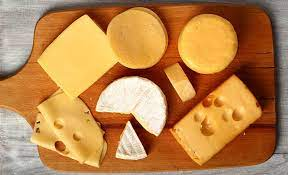
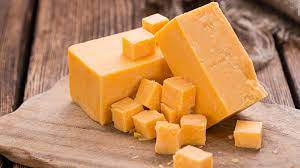
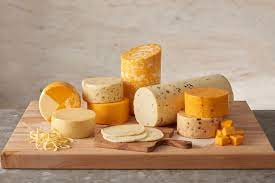
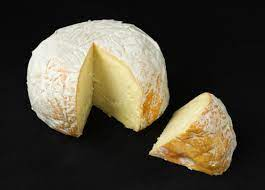
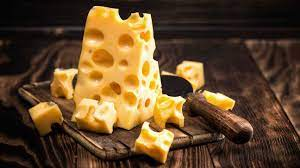
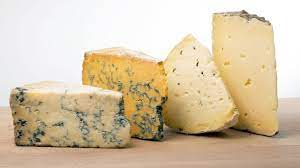
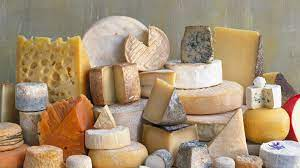
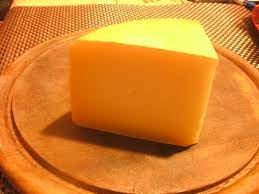

In [257]:
src_list

In [258]:
for x in src_list:
    print(len(x))

63
101
10819
10075
7739
6987
11247
7599
11079
9347


In [259]:
for x in src_list:
    driver.execute_script('window.open()')
    driver.switch_to.window(driver.window_handles[-1])
    driver.get(x)

In [260]:
import pandas as pd

In [261]:
df = pd.read_pickle('esrb_ratings.pkl')

In [262]:
df.head()

,title,consoles,descriptors,rating
0,Blizzard Arcade Collection,"[PlayStation 4, Nintendo Switch, Xbox One]","[Blood, Fantasy Violence, Language, Use of Tob...",T
1,Rez Infinite,[PlayStation 4],[Fantasy Violence],E10plus
2,Hotshot Racing,"[PlayStation 4, Nintendo Switch]","[Alcohol Reference, Language, Mild Violence]",E10plus
3,Sea of Solitude : The Director's Cut,[Nintendo Switch],"[Fantasy Violence, Language]",T
4,Ape Out,[Nintendo Switch],"[Blood and Gore, Violence]",T
